## Finding the Best Market for Advertisement

The project is centered around a company who is in the e-learning industry; They offer programming courses on web and mobile development. In order to promote the company advertisements will be made and the goal of this project is to find the best two markets or areas (from the above listed ones) that would better for investments in advertisements

In [1]:
# Importing the libraries 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Changing the default display format in pandas
pd.options.display.max_columns = 150

In [2]:
# Reading in the dataset (because the file is large low_memory argument = False argument was invoked)
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)


In [3]:
# Previewing the dataset
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [5]:
# Frequency distribution of the City population column
survey['CityPopulation'].value_counts()

more than 1 million              6534
between 100,000 and 1 million    5276
less than 100,000                3544
Name: CityPopulation, dtype: int64

## Isolating Column of Interest

Since the goal is to pick the best two areas for marketing, one of the columns of choice is the JobRoleInterest column

In [6]:
(survey['JobRoleInterest'].value_counts(normalize = True) * 100)

Full-Stack Web Developer                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                    6.435927
  Data Scientist                                                                                                                             2.173913
Back-End Web Developer                                                                                                                       2.030892
  Mobile Developer                                                                                                                           1.673341
                                                                                                                                              ...    
  Mobile Developer, Information Security, Full-Stack Web Developer                                  

### Result

From the result of the above analysis, it is obvious there are individuals who are interested in more than one subject area. In order to know the best area to focus on (if more individuals want just one or different roles), it is important to know how what percentage of the population has one or more interests. 

#### Guaging the Interest in Subjects

In [7]:
# Removing null values
clean_survey = survey[survey['JobRoleInterest'].notnull().copy()]

# Frequency Distribution of Number of interests
subject_interest = clean_survey['JobRoleInterest'].apply(lambda row: len(row.split(','))).value_counts(normalize=True) * 100

subject_interest

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

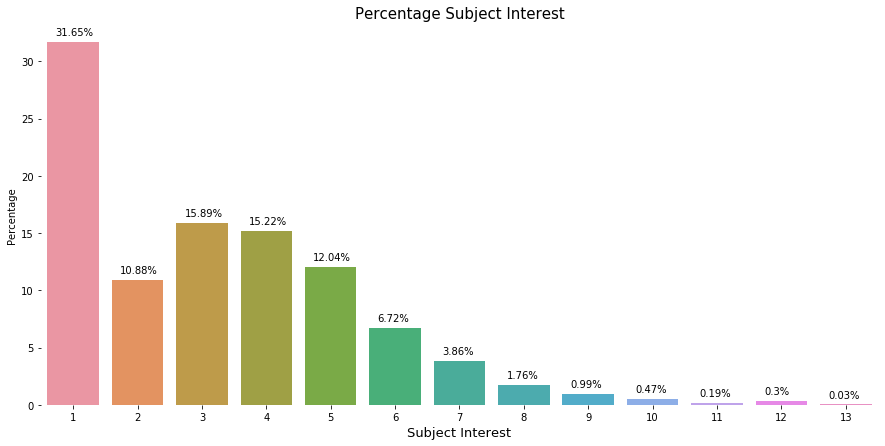

In [8]:
# Creating a figure object
plt.figure(figsize= (15,7))

# Plotting the graph
ax = sns.barplot(x = subject_interest.index, y = subject_interest)
sns.despine(left=True, bottom=True) # Removing the borders

plt.title('Percentage Subject Interest', fontsize = 15)
plt.ylabel('Percentage')
plt.xlabel('Subject Interest', {'size':13})

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.13, i.get_height()+.6, \
            str(round((i.get_height()), 2))+'%', fontsize=10
                );

C:\Users\MERI\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


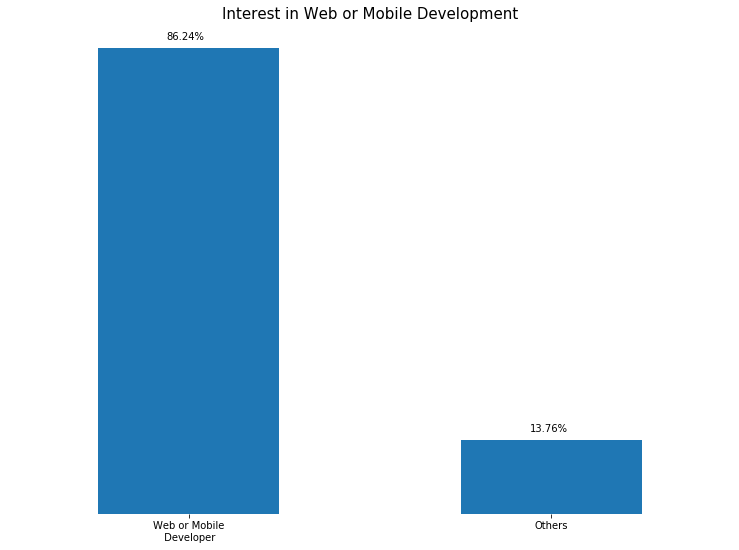

In [9]:
web_mobile = clean_survey['JobRoleInterest'].str.contains('Web Developer|Mobile Developer').value_counts(normalize=True) * 100

# Plotting the graph
ax = web_mobile.plot.bar(figsize = (13, 9))

# Changing the label
ax.set_xticklabels(['Web or Mobile\n Developer', 'Others'], rotation = 0)

# Removing the borders
sns.despine(left=True, bottom=True)

# Giving the graph a title
plt.title('Interest in Web or Mobile Development', fontsize = 15)

plt.axes().get_yaxis().set_visible(False) # Removing the y axis 

# Giving each bar a label
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.19, i.get_height()+1.5, 
            "{}%".format(round((i.get_height()), 2)), fontsize=10
                )


### Focusing on Company 

Given that the company specializes in training individuals in Web and Mobile Development, it is important to know the number of individuals that indicated interest in Mobile or Web development. 

### Generating Absolute and Relative Frequencies

In [10]:
# Raw count
absol = clean_survey['CountryLive'].value_counts()

# Percentage count
relat = round(clean_survey['CountryLive'].value_counts(normalize = True) * 100, 2)

freq = pd.DataFrame({'Absolute Count': absol, 'Percentage Count': relat})

freq.head()

,Absolute Count,Percentage Count
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92


Although the frequency table points out that the United States of America and India have the highest number of customers, however, we will not decide on picking these countries based on the above. A more indepth analysis would be performed which will determine the countries that spend the most on courses.

In [11]:
# Picking out countries from the top 4 count
top_4 = clean_survey[clean_survey['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]

#this was done because some individuals wrote that they have spent 0 months in programming (started that month)
#so that avoid dividing by zero which would return an error, we divided by one
top_4['MonthsProgramming'].replace(0, 1, inplace = True)


#Craeting a monthly payment column for courses
top_4['PayPerMont']  = top_4['MoneyForLearning'] / top_4['MonthsProgramming']

# Removing the null values from the monthly payment column
top_4.dropna(subset=['PayPerMont'], inplace=True)

C:\Users\MERI\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\MERI\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\MERI\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [12]:
top_4[['MoneyForLearning', 'MonthsProgramming', 'PayPerMont']].head()

,MoneyForLearning,MonthsProgramming,PayPerMont
1,80.0,6.0,13.333333
2,1000.0,5.0,200.000000
6,0.0,12.0,0.000000
15,0.0,1.0,0.000000
16,200.0,12.0,16.666667


In [13]:
# Grouping the Countries
country = top_4.groupby('CountryLive')

# Mean payment by country
country['PayPerMont'].mean().sort_values(ascending = False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: PayPerMont, dtype: float64

In [14]:
# Checking the median monthly payment 
country['PayPerMont'].median().sort_values(ascending = False)

CountryLive
United States of America    3.333333
United Kingdom              0.000000
India                       0.000000
Canada                      0.000000
Name: PayPerMont, dtype: float64

In [15]:
# Checking the most occuring monthly across countries
country['PayPerMont'].apply(lambda x: x.mode()[0])

CountryLive
Canada                      0.0
India                       0.0
United Kingdom              0.0
United States of America    0.0
Name: PayPerMont, dtype: float64

### Visualizing the Monthly Spend

To see how countries spend, it is important to use a box and whisker plot to examine the monthly amount spent. Using a box and whisker plot is important to be able to see which countries spend the most 

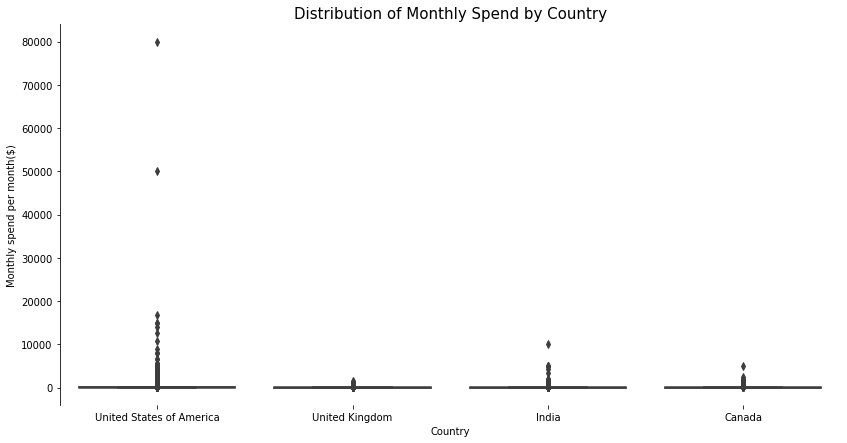

In [16]:
plt.figure(figsize = (14,7))
sns.boxplot(y = 'PayPerMont', x= 'CountryLive', data = top_4)
plt.title('Distribution of Monthly Spend by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Monthly spend per month($)')
sns.despine(bottom=True);

There are extreme outliers for United States of America. From the figure above, most of the values occur below $20000 so we will eliminate values higher than this amount.

### Removing Extreme Outliers

### Step 1

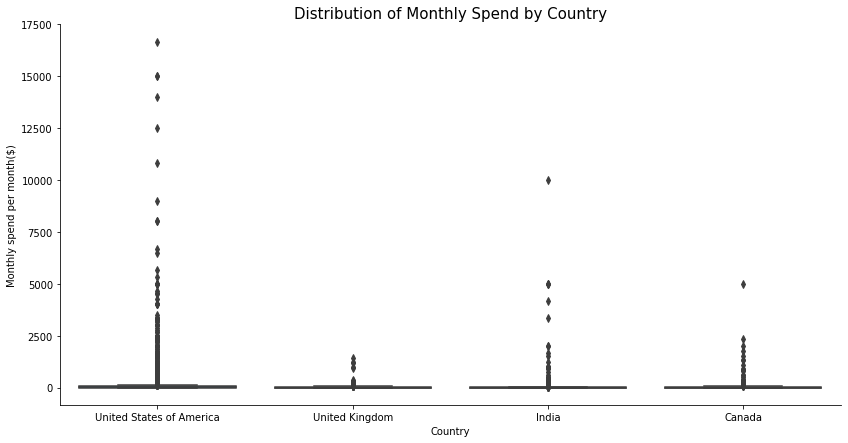

In [17]:
# Given that most individuals spend $20000 and below, we removed individuals  who spend above $18,000
clean_top = top_4[top_4['PayPerMont'] < 18000]

# Plotting the graph for the dataset void of outliers
plt.figure(figsize = (14,7))
sns.boxplot(y = 'PayPerMont', x= 'CountryLive', data = clean_top)
plt.title('Distribution of Monthly Spend by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Monthly spend per month($)')
sns.despine();

In [18]:
mm = clean_top.groupby('CountryLive')

mm['PayPerMont'].mean().sort_values(ascending = False)

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: PayPerMont, dtype: float64

### Step 2

For the first step we eliminated outliers that were above 18000. However, we were still left with a lot more. Thus we decided to only include values that were less than or equal to 3000. 3000 was chosen because most of the values are concentrated below this figure

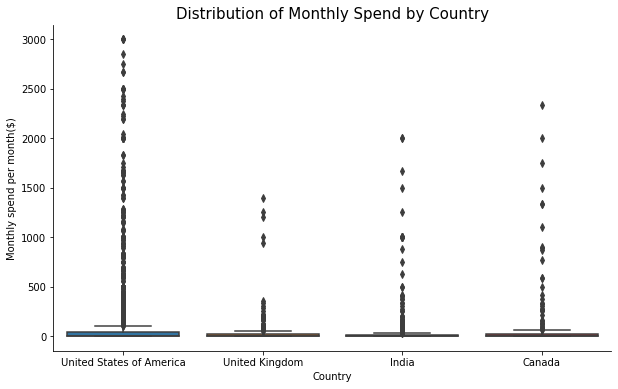

In [19]:
less_3000 = top_4[top_4['PayPerMont'] <= 3000]


plt.figure(figsize = (10,6))
sns.boxplot(y = 'PayPerMont', x= 'CountryLive', data = less_3000)
plt.title('Distribution of Monthly Spend by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Monthly spend per month($)')
sns.despine();

## Choosing The Best Market

In [20]:
five_less = less_3000.groupby('CountryLive')

five_less['PayPerMont'].mean().sort_values(ascending = False)

CountryLive
United States of America    110.517129
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: PayPerMont, dtype: float64

In [21]:
five_less['CityPopulation'].value_counts()

CountryLive               CityPopulation               
Canada                    more than 1 million               124
                          between 100,000 and 1 million      82
                          less than 100,000                  31
India                     more than 1 million               266
                          between 100,000 and 1 million     146
                          less than 100,000                  42
United Kingdom            between 100,000 and 1 million     100
                          more than 1 million                99
                          less than 100,000                  76
United States of America  between 100,000 and 1 million    1131
                          less than 100,000                 878
                          more than 1 million               860
Name: CityPopulation, dtype: int64

Given the analysis, it can be recommended that USA is the best country to focus on as the population and monthly spend supports the subscription based model. Although the mean amount spent montly ranks third, given the population, I would recommend targeting India as another country to target.

<br>However, most of the advertisement should be done in the United States